<a href="https://colab.research.google.com/github/csbae/actionet/blob/master/K-means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [0]:
num_dots = 1000
num_clusters = 3
num_epochs = 100

In [0]:
dots = []
for i in range(num_dots):
  if np.random.random() > 0.66:
    dots.append([np.random.normal(0.0, 1.0), np.random.normal(2.0, 0.5)])
  elif np.random.random() > 0.33:
    dots.append([np.random.normal(2.0, 1.3), np.random.normal(-1.0, 0.6)])
  else :
    dots.append([np.random.normal(-1.0, 0.8), np.random.normal(-2.0, 1.2)])

In [0]:
df = pd.DataFrame({"x": [v[0] for v in dots], "y": [v[1]for v in dots]})

In [7]:
df.head(10)

,x,y
0,0.276088,2.315974
1,1.460024,1.876051
2,-0.896425,-1.680417
3,-0.058005,-1.131335
4,-1.126707,-1.876055
5,1.774801,1.806100
6,1.039391,0.954111
7,2.234752,-0.224155
8,4.344846,-0.205869
9,0.552826,1.947598


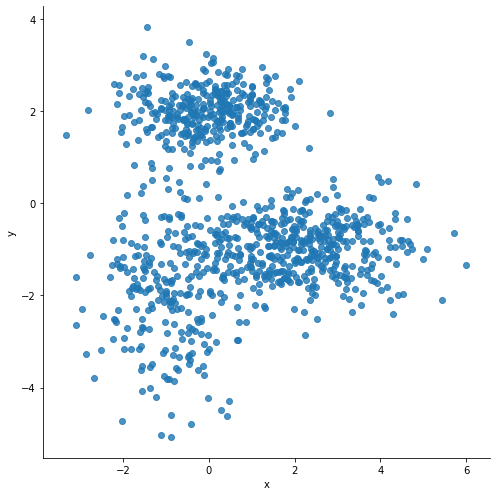

In [10]:
sns.lmplot("x", "y", data=df, fit_reg=False, height=7)
plt.show()

In [11]:
vectors = tf.constant(dots)
vectors.get_shape()

TensorShape([Dimension(1000), Dimension(2)])

In [12]:
centroids = tf.Variable(tf.slice(tf.random_shuffle(vectors), [0, 0], [num_clusters, -1]))
centroids.get_shape()

TensorShape([Dimension(3), Dimension(2)])

In [13]:
expanded_vectors = tf.expand_dims(vectors, 0)
expanded_centroids = tf.expand_dims(centroids, 1)

print(expanded_vectors.get_shape())
print(expanded_centroids.get_shape())

(1, 1000, 2)
(3, 1, 2)


In [15]:
distances = tf.reduce_sum(tf.square(tf.subtract(expanded_vectors, expanded_centroids)), 2)
assignments = tf.argmin(distances, 0)
assignments.get_shape()

TensorShape([Dimension(1000)])

In [16]:
means = tf.concat([tf.reduce_mean(tf.gather(vectors,
                        tf.reshape(tf.where(tf.equal(assignments, c)), [1, -1])), reduction_indices=[1]) 
                                 for c in range(num_clusters)], 0)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [0]:
centroids_updated = tf.assign(centroids, means)

In [18]:
with tf.Session() as sess:
  sess.run(tf.global_variables_initializer())
  for step in range(num_epochs):
    _, centroid_values, assignment_values = sess.run([centroids_updated, centroids, assignments])
print("중심점")
print(centroid_values)

중심점
[[-0.06864843  1.9538499 ]
 [-0.72667253 -1.8761251 ]
 [ 2.450911   -0.93733555]]


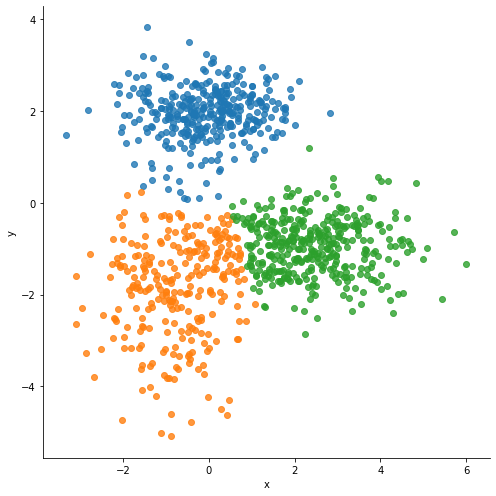

In [20]:
data = {"x": [], "y": [], "cluster": []}
for i in range(len(assignment_values)):
  data["x"].append(dots[i][0])
  data["y"].append(dots[i][1])
  data["cluster"].append(assignment_values[i])
df = pd.DataFrame(data)
sns.lmplot("x", "y", data=df, fit_reg=False, height=7, hue="cluster", legend=False)
plt.show()